## Arbol de decisión

Analisis de datos Fase 5

In [3]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Separar características y etiquetas
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [7]:
# Dividir datos en conjuntos de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)


In [8]:
# Normalizar los datos
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)


In [9]:
# Definir los hiperparámetros a ajustar para el árbol de decisión
param_grid_tree = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [10]:
# Crear un clasificador de árbol de decisión
tree_clf = DecisionTreeClassifier()

# Realizar la búsqueda en cuadrícula para el árbol de decisión
grid_search_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5)
grid_search_tree.fit(Xtrain_scaled, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [11]:
# Imprimir los mejores hiperparámetros para el árbol de decisión
print("Mejores hiperparámetros para el árbol de decisión:", grid_search_tree.best_params_)


Mejores hiperparámetros para el árbol de decisión: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [12]:
# Obtener el mejor modelo de árbol de decisión
best_tree_clf = grid_search_tree.best_estimator_

In [13]:
# Definir los hiperparámetros a ajustar para el Random Forest
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [14]:
# Crear un clasificador Random Forest
forest_clf = RandomForestClassifier()

# Realizar la búsqueda en cuadrícula para el Random Forest
grid_search_forest = GridSearchCV(forest_clf, param_grid_forest, cv=5)
grid_search_forest.fit(Xtrain_scaled, ytrain)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [15]:
# Imprimir los mejores hiperparámetros para el Random Forest
print("Mejores hiperparámetros para el Random Forest:", grid_search_forest.best_params_)


Mejores hiperparámetros para el Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
# Obtener el mejor modelo de Random Forest
best_forest_clf = grid_search_forest.best_estimator_

In [17]:
# Realizar predicciones en el conjunto de prueba usando el árbol de decisión
pred_tree = best_tree_clf.predict(Xtest_scaled)


In [18]:
# Mostrar métricas de rendimiento para el árbol de decisión
print("Métricas para el árbol de decisión:")
result_tree = confusion_matrix(ytest, pred_tree)
print("Confusion Matrix:")
print(result_tree)

result1_tree = classification_report(ytest, pred_tree)
print("Classification Report:")
print(result1_tree)

result2_tree = accuracy_score(ytest, pred_tree)
print("Accuracy:", result2_tree)


Métricas para el árbol de decisión:
Confusion Matrix:
[[130  27]
 [ 37  37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       157
           1       0.58      0.50      0.54        74

    accuracy                           0.72       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.71      0.72      0.72       231

Accuracy: 0.7229437229437229


In [19]:
# Realizar predicciones en el conjunto de prueba usando Random Forest
pred_forest = best_forest_clf.predict(Xtest_scaled)

In [20]:
# Mostrar métricas de rendimiento para Random Forest
print("\nMétricas para Random Forest:")
result_forest = confusion_matrix(ytest, pred_forest)
print("Confusion Matrix:")
print(result_forest)

result1_forest = classification_report(ytest, pred_forest)
print("Classification Report:")
print(result1_forest)

result2_forest = accuracy_score(ytest, pred_forest)
print("Accuracy:", result2_forest)


Métricas para Random Forest:
Confusion Matrix:
[[141  16]
 [ 40  34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       157
           1       0.68      0.46      0.55        74

    accuracy                           0.76       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.75      0.76      0.74       231

Accuracy: 0.7575757575757576


In [21]:
# Realizar validación cruzada para Random Forest
cv_scores_forest = cross_val_score(best_forest_clf, X, y, cv=5)
print("\nAccuracy (Cross-Validation) para Random Forest:", np.mean(cv_scores_forest))


Accuracy (Cross-Validation) para Random Forest: 0.7734997029114676


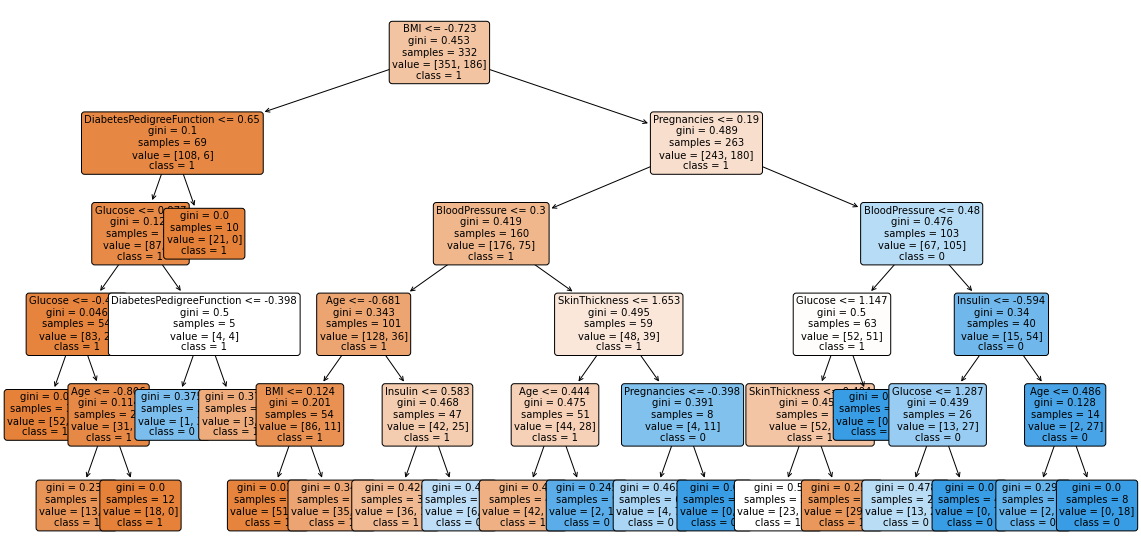

In [43]:
# Obtener nombres de características como lista
feature_names = list(X.columns)

# Obtener nombres de clases como lista
class_names = df['Outcome'].unique().astype(str).tolist()

# Visualizar un árbol aleatorio del Random Forest (puedes cambiar el índice)
tree_index_to_visualize = 0
plt.figure(figsize=(20, 10))
plot_tree(best_forest_clf.estimators_[tree_index_to_visualize], filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
plt.show()